# Task
Perform a humanitarian crisis analysis by first loading `hpc_hno_2025.csv` (skipping HXL tags) and `country_level_summary (1).csv`. Preprocess the data by converting key metrics to numeric and filtering out 'ALL' clusters. Then, engineering a `df_country_metrics` dataframe to calculate 'Targeting Efficiency', 'Budget Intensity', 'Need Prevalence', 'Beneficiary-to-Budget Ratio', and a 'Mismatch Score' based on normalized severity and budget per PIN, while categorizing countries into Severity Quartiles. Finally, perform a sectoral benchmarking analysis and summarize the findings to identify the most overlooked crises.

## Data Loading and Preprocessing

### Subtask:
Load the datasets, remove HXL tags, convert columns to numeric, and filter specific clusters.


**Reasoning**:
Load the datasets, clean the HXL tags from the HNO dataset, convert relevant columns to numeric, and filter out the 'ALL' cluster as requested.



In [1]:
import pandas as pd

# Load the datasets
df_hno = pd.read_csv('hpc_hno_2025.csv')
df_summary = pd.read_csv('country_level_summary (1).csv')

# Remove HXL tags (first row, index 0) from df_hno
df_hno = df_hno.drop(0).reset_index(drop=True)

# Convert columns to numeric types
cols_to_numeric = ['Population', 'In Need', 'Targeted']
for col in cols_to_numeric:
    df_hno[col] = pd.to_numeric(df_hno[col], errors='coerce')

# Filter out rows where Cluster is 'ALL'
df_hno = df_hno[df_hno['Cluster'] != 'ALL']

# Display the first 5 rows and info to verify
display(df_hno.head())
df_hno.info()

/tmp/ipython-input-3354339746.py:4: DtypeWarning: Columns (1,2,5,6,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hno = pd.read_csv('hpc_hno_2025.csv')


,Country ISO3,Admin 1 PCode,Admin 1 Name,Admin 2 PCode,Admin 2 Name,Admin 3 PCode,Admin 3 Name,Description,Cluster,Category,Population,In Need,Targeted,Affected,Reached,Info
47,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Coordination and Common Services,CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Final HRP caseload,EDU,NaN,NaN,8887445.0,831329.0,NaN,NaN,NaN
49,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Final HRP caseload,EDU,Boys,NaN,4532598.0,393309.0,NaN,NaN,NaN
50,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Final HRP caseload,EDU,Children,NaN,8887445.0,831329.0,NaN,NaN,NaN
51,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Final HRP caseload,EDU,Girls,NaN,4354847.0,438020.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 285090 entries, 47 to 318258
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country ISO3   285090 non-null  object 
 1   Admin 1 PCode  14097 non-null   object 
 2   Admin 1 Name   14097 non-null   object 
 3   Admin 2 PCode  206056 non-null  object 
 4   Admin 2 Name   206056 non-null  object 
 5   Admin 3 PCode  62636 non-null   object 
 6   Admin 3 Name   62636 non-null   object 
 7   Description    285090 non-null  object 
 8   Cluster        279520 non-null  object 
 9   Category       284775 non-null  object 
 10  Population     0 non-null       float64
 11  In Need        278809 non-null  float64
 12  Targeted       239883 non-null  float64
 13  Affected       0 non-null       object 
 14  Reached        0 non-null       object 
 15  Info           5570 non-null    object 
dtypes: float64(3), object(13)
memory usage: 37.0+ MB


**Reasoning**:
The previous execution produced a `DtypeWarning` when reading `hpc_hno_2025.csv` due to mixed types (likely caused by the HXL tags in the first row). I will add `low_memory=False` to the `read_csv` call to resolve this warning.



In [2]:
import pandas as pd

# Load the datasets with low_memory=False to handle mixed types warning
df_hno = pd.read_csv('hpc_hno_2025.csv', low_memory=False)
df_summary = pd.read_csv('country_level_summary (1).csv')

# Remove HXL tags (first row, index 0) from df_hno
df_hno = df_hno.drop(0).reset_index(drop=True)

# Convert columns to numeric types
cols_to_numeric = ['Population', 'In Need', 'Targeted']
for col in cols_to_numeric:
    df_hno[col] = pd.to_numeric(df_hno[col], errors='coerce')

# Filter out rows where Cluster is 'ALL'
df_hno = df_hno[df_hno['Cluster'] != 'ALL']

# Display the first 5 rows and info to verify
display(df_hno.head())
df_hno.info()

,Country ISO3,Admin 1 PCode,Admin 1 Name,Admin 2 PCode,Admin 2 Name,Admin 3 PCode,Admin 3 Name,Description,Cluster,Category,Population,In Need,Targeted,Affected,Reached,Info
47,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Coordination and Common Services,CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Final HRP caseload,EDU,NaN,NaN,8887445.0,831329.0,NaN,NaN,NaN
49,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Final HRP caseload,EDU,Boys,NaN,4532598.0,393309.0,NaN,NaN,NaN
50,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Final HRP caseload,EDU,Children,NaN,8887445.0,831329.0,NaN,NaN,NaN
51,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Final HRP caseload,EDU,Girls,NaN,4354847.0,438020.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 285090 entries, 47 to 318258
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country ISO3   285090 non-null  object 
 1   Admin 1 PCode  14097 non-null   object 
 2   Admin 1 Name   14097 non-null   object 
 3   Admin 2 PCode  206056 non-null  object 
 4   Admin 2 Name   206056 non-null  object 
 5   Admin 3 PCode  62636 non-null   object 
 6   Admin 3 Name   62636 non-null   object 
 7   Description    285090 non-null  object 
 8   Cluster        279520 non-null  object 
 9   Category       284775 non-null  object 
 10  Population     0 non-null       float64
 11  In Need        278809 non-null  float64
 12  Targeted       239883 non-null  float64
 13  Affected       0 non-null       object 
 14  Reached        0 non-null       object 
 15  Info           5570 non-null    object 
dtypes: float64(3), object(13)
memory usage: 37.0+ MB


## Metric Engineering

### Subtask:
Create df_country_metrics and calculate key indicators including Need Prevalence, Targeting Efficiency, Budget metrics, and Mismatch Score.


**Reasoning**:
Load the population data, clean it, merge it with the summary dataframe, and then calculate all the requested metrics including normalization and quartiles.



In [3]:
import pandas as pd
import numpy as np

# 1. Create df_country_metrics by creating a copy of df_summary
df_country_metrics = df_summary.copy()

# 2. Load cod_population_admin0.csv
df_pop = pd.read_csv('cod_population_admin0.csv')

# Remove HXL tag row (row 0)
df_pop = df_pop.drop(0).reset_index(drop=True)

# Rename columns for merging if necessary, usually it has ISO3
# Let's check columns or standard names. Assuming 'Country ISO3' or similar exists.
# Based on standard COD files, it likely has 'T_ISO3' or 'Country ISO3' and 'Population'.
# Let's inspect columns briefly or standardizing them.
# HXL usually has '#country+code+iso3' which we dropped.
# Let's assume the column headers are in the original header (now row 0 of raw file, but read_csv takes header=0 by default).
# Since we dropped row 0 (which was HXL tags), the columns are the headers.
# We need to ensure we merge on the correct column.
# Often these files have 'Country ISO3' or 'ISO3'. Let's look for a likely candidate.
# Actually, let's print columns to be safe, but I will try to detect it or assume standard 'Country ISO3'.
# If the file follows standard OCHA format, it might have 'Country ISO3'.

# To be robust, I will print column names if I were interactive, but here I must write the code.
# I will try to standardize the merge key.

# Let's assume standard column name 'Country ISO3' for now based on df_summary.
# If df_pop has different name, I'll rename.
# Inspecting df_pop columns usually: 'Country', 'Country ISO3', 'Population'

# Ensure population is numeric
# Find the population column. It's usually 'Population'.
col_map = {col: col for col in df_pop.columns}
# Just in case, let's try to convert all potentially numeric columns.
# But specifically we need the ISO3 and Population.

# Let's assume the column with 'ISO3' in it is the key and 'Population' is the value.
iso_col = [c for c in df_pop.columns if 'ISO3' in c or 'iso3' in c]
pop_col = [c for c in df_pop.columns if 'Population' in c or 'population' in c]

if iso_col and pop_col:
    df_pop = df_pop[[iso_col[0], pop_col[0]]].copy()
    df_pop.columns = ['Country ISO3', 'Population']
    df_pop['Population'] = pd.to_numeric(df_pop['Population'], errors='coerce')

    # Merge
    df_country_metrics = df_country_metrics.merge(df_pop, on='Country ISO3', how='left')
else:
    print("Could not automatically identify ISO3 or Population columns in cod_population_admin0.csv. Columns found:", df_pop.columns)

# 3. Ensure columns are numeric
numeric_cols = ['revisedRequirements', 'In Need', 'Targeted', 'Population']
for col in numeric_cols:
    if col in df_country_metrics.columns:
        df_country_metrics[col] = pd.to_numeric(df_country_metrics[col], errors='coerce')

# 4. Calculate derived metrics
# Need Prevalence
df_country_metrics['Need Prevalence'] = df_country_metrics['In Need'] / df_country_metrics['Population']

# Targeting Efficiency
df_country_metrics['Targeting Efficiency'] = df_country_metrics['Targeted'] / df_country_metrics['In Need']

# Budget per PIN
df_country_metrics['Budget per PIN'] = df_country_metrics['revisedRequirements'] / df_country_metrics['In Need']

# Beneficiary-to-Budget Ratio
df_country_metrics['Beneficiary-to-Budget Ratio'] = df_country_metrics['Targeted'] / df_country_metrics['revisedRequirements']

# 5. Normalize Need Prevalence and Budget per PIN
scaler_cols = ['Need Prevalence', 'Budget per PIN']
for col in scaler_cols:
    min_val = df_country_metrics[col].min()
    max_val = df_country_metrics[col].max()
    df_country_metrics[f'Normalized {col}'] = (df_country_metrics[col] - min_val) / (max_val - min_val)

# 6. Mismatch Score
df_country_metrics['Mismatch Score'] = df_country_metrics['Normalized Need Prevalence'] - df_country_metrics['Normalized Budget per PIN']

# 7. Severity Quartile
# Handle NaNs before qcut if necessary, though qcut can handle them by outputting NaN
df_country_metrics['Severity Quartile'] = pd.qcut(df_country_metrics['Need Prevalence'], q=4, labels=['Low', 'Medium', 'High', 'Critical'])

# 8. Display
display(df_country_metrics.head())
df_country_metrics.info()

ValueError: Bin edges must be unique: Index([nan, nan, nan, nan, nan], dtype='float64', name='Need Prevalence').
You can drop duplicate edges by setting the 'duplicates' kwarg

**Reasoning**:
The previous code failed because it selected the `Population_group` column (which contains text) instead of the `Population` column, and potentially failed to handle comma-formatted numbers, leading to all-NaN values for `Need Prevalence` and a ValueError in `pd.qcut`. I will correct the column selection logic, clean the numeric data, and add error handling for the quartile calculation.



In [4]:
import pandas as pd
import numpy as np

# 1. Create df_country_metrics by creating a copy of df_summary
df_country_metrics = df_summary.copy()

# 2. Load cod_population_admin0.csv
df_pop = pd.read_csv('cod_population_admin0.csv', low_memory=False)

# Remove HXL tags (first row, index 0) from df_pop
df_pop = df_pop.drop(0).reset_index(drop=True)

# Identify proper ISO3 and Population columns
iso_cols = [c for c in df_pop.columns if 'iso3' in c.lower()]
# Avoid 'Population_group' or similar text columns, target 'Population'
pop_cols = [c for c in df_pop.columns if 'population' in c.lower() and 'group' not in c.lower()]

if iso_cols and pop_cols:
    iso_col = iso_cols[0]
    pop_col = pop_cols[0]

    # Select and Rename
    df_pop = df_pop[[iso_col, pop_col]].copy()
    df_pop.columns = ['Country ISO3', 'Population']

    # Clean Population column (remove commas and convert to numeric)
    df_pop['Population'] = df_pop['Population'].astype(str).str.replace(',', '', regex=False)
    df_pop['Population'] = pd.to_numeric(df_pop['Population'], errors='coerce')

    # Merge
    df_country_metrics = df_country_metrics.merge(df_pop, on='Country ISO3', how='left')
else:
    print(f"Could not identify ISO3 or Population columns. Found: {df_pop.columns}")

# 3. Ensure columns are numeric in the metrics dataframe
numeric_cols = ['revisedRequirements', 'In Need', 'Targeted']
for col in numeric_cols:
    if col in df_country_metrics.columns:
        # Ensure we handle any string formatting like commas
        if df_country_metrics[col].dtype == 'object':
             df_country_metrics[col] = df_country_metrics[col].astype(str).str.replace(',', '', regex=False)
        df_country_metrics[col] = pd.to_numeric(df_country_metrics[col], errors='coerce')

# 4. Calculate derived metrics
if 'Population' in df_country_metrics.columns:
    df_country_metrics['Need Prevalence'] = df_country_metrics['In Need'] / df_country_metrics['Population']
else:
    df_country_metrics['Need Prevalence'] = np.nan

df_country_metrics['Targeting Efficiency'] = df_country_metrics['Targeted'] / df_country_metrics['In Need']
df_country_metrics['Budget per PIN'] = df_country_metrics['revisedRequirements'] / df_country_metrics['In Need']
df_country_metrics['Beneficiary-to-Budget Ratio'] = df_country_metrics['Targeted'] / df_country_metrics['revisedRequirements']

# 5. Normalize Need Prevalence and Budget per PIN
scaler_cols = ['Need Prevalence', 'Budget per PIN']
for col in scaler_cols:
    if col in df_country_metrics.columns and df_country_metrics[col].notna().any():
        min_val = df_country_metrics[col].min()
        max_val = df_country_metrics[col].max()
        if max_val > min_val:
            df_country_metrics[f'Normalized {col}'] = (df_country_metrics[col] - min_val) / (max_val - min_val)
        else:
             df_country_metrics[f'Normalized {col}'] = 0
    else:
        df_country_metrics[f'Normalized {col}'] = np.nan

# 6. Mismatch Score
if 'Normalized Need Prevalence' in df_country_metrics.columns and 'Normalized Budget per PIN' in df_country_metrics.columns:
    df_country_metrics['Mismatch Score'] = df_country_metrics['Normalized Need Prevalence'] - df_country_metrics['Normalized Budget per PIN']

# 7. Severity Quartile
# Use duplicates='drop' to handle cases with skewed distributions or insufficient unique values
if 'Need Prevalence' in df_country_metrics.columns and df_country_metrics['Need Prevalence'].notna().sum() > 0:
    try:
        df_country_metrics['Severity Quartile'] = pd.qcut(df_country_metrics['Need Prevalence'], q=4, labels=['Low', 'Medium', 'High', 'Critical'], duplicates='drop')
    except ValueError as e:
        print(f"Could not calculate quartiles: {e}")
        df_country_metrics['Severity Quartile'] = np.nan
else:
    df_country_metrics['Severity Quartile'] = np.nan

# 8. Display
display(df_country_metrics.head())
df_country_metrics.info()

,Country ISO3,In Need,Targeted,revisedRequirements,Total_Population,Severity_Score,Cost_per_Beneficiary,Outlier_Flag,Population,Need Prevalence,Targeting Efficiency,Budget per PIN,Beneficiary-to-Budget Ratio,Normalized Need Prevalence,Normalized Budget per PIN,Mismatch Score,Severity Quartile
0,AFG,147946862,95288881.0,26874340201,40411869.0,3.660975,282.030179,0,20567657.0,7.193180,0.644075,181.648599,0.003546,0.002593,0.040371,-0.037778,Medium
1,AFG,147946862,95288881.0,26874340201,40411869.0,3.660975,282.030179,0,40411869.0,3.660975,0.644075,181.648599,0.003546,0.001305,0.040371,-0.039066,Low
2,AFG,147946862,95288881.0,26874340201,40411869.0,3.660975,282.030179,0,3571135.0,41.428527,0.644075,181.648599,0.003546,0.015075,0.040371,-0.025296,High
3,AFG,147946862,95288881.0,26874340201,40411869.0,3.660975,282.030179,0,3707169.0,39.908313,0.644075,181.648599,0.003546,0.014520,0.040371,-0.025851,High
4,AFG,147946862,95288881.0,26874340201,40411869.0,3.660975,282.030179,0,7278304.0,20.327107,0.644075,181.648599,0.003546,0.007381,0.040371,-0.032990,High


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Country ISO3                 784 non-null    object  
 1   In Need                      784 non-null    int64   
 2   Targeted                     784 non-null    float64 
 3   revisedRequirements          784 non-null    int64   
 4   Total_Population             784 non-null    float64 
 5   Severity_Score               784 non-null    float64 
 6   Cost_per_Beneficiary         784 non-null    float64 
 7   Outlier_Flag                 784 non-null    int64   
 8   Population                   780 non-null    float64 
 9   Need Prevalence              780 non-null    float64 
 10  Targeting Efficiency         784 non-null    float64 
 11  Budget per PIN               784 non-null    float64 
 12  Beneficiary-to-Budget Ratio  784 non-null    float64 
 13  Norma

## Sectoral Benchmarking

### Subtask:
Group the HNO data by sector to benchmark global totals for People in Need and Targeted, and calculate coverage.


**Reasoning**:
Group the HNO data by sector to calculate global totals for 'In Need' and 'Targeted', compute the coverage ratio, and sort the results to identify sectors with the highest needs.



In [5]:
import pandas as pd

# 1. Group by 'Cluster' and aggregate sum of 'In Need' and 'Targeted'
df_sector_bench = df_hno.groupby('Cluster')[['In Need', 'Targeted']].sum().reset_index()

# 2. Calculate 'Coverage'
df_sector_bench['Coverage'] = df_sector_bench['Targeted'] / df_sector_bench['In Need']

# 3. Sort by 'In Need' in descending order
df_sector_bench = df_sector_bench.sort_values(by='In Need', ascending=False)

# 4. Display the result
display(df_sector_bench)

,Cluster,In Need,Targeted,Coverage
10,PRO,1.287512e+09,3.947563e+08,0.306604
4,FSC,1.074554e+09,5.961181e+08,0.554759
5,HEA,9.500322e+08,4.422730e+08,0.465535
17,WSH,9.469302e+08,4.248440e+08,0.448654
12,PRO-GBV,5.310557e+08,1.279035e+08,0.240848
11,PRO-CPN,5.037246e+08,1.661021e+08,0.329748
15,SHL,5.003339e+08,1.519035e+08,0.303604
2,EDU,3.937204e+08,1.285756e+08,0.326566
14,PRO-MIN,3.915516e+08,1.051137e+08,0.268454
9,NUT,3.508347e+08,2.159443e+08,0.615516


## Final Analysis and Summary

### Subtask:
Identify the most overlooked crises using Mismatch Scores and summarize sectoral benchmarking findings.


**Reasoning**:
Sort df_country_metrics by Mismatch Score to find overlooked crises, display top 10, then display top sector benchmarks, and finally print a summary of findings.



In [6]:
import pandas as pd

# 1. Sort by Mismatch Score descending to identify overlooked crises
df_sorted_metrics = df_country_metrics.sort_values(by='Mismatch Score', ascending=False)

# 2. Create df_overlooked with top 10
cols_to_show = ['Country ISO3', 'Need Prevalence', 'Budget per PIN', 'Mismatch Score', 'Severity Quartile']
df_overlooked = df_sorted_metrics.head(10)[cols_to_show].copy()

print("Top 10 Overlooked Crises (High Needs, Low Budget):")
display(df_overlooked)

# 3. Display top 5 sectors by needs
print("\nTop 5 Sectors by Needs:")
display(df_sector_bench.head(5))

# 4. Print Summary
top_3_countries = df_overlooked['Country ISO3'].head(3).tolist()
top_3_sectors = df_sector_bench.head(3)

summary = """
### Analysis Summary

**Most Overlooked Crises:**
The analysis identifies the top 3 countries with the highest 'Mismatch Score' (indicating high normalized need prevalence relative to normalized budget per person in need) as: {}.
These countries exhibit a critical gap between the severity of needs and the financial resources allocated per person.

**Sectoral Needs:**
The three sectors with the highest total 'People in Need' are:
1. {} (Coverage: {:.1%})
2. {} (Coverage: {:.1%})
3. {} (Coverage: {:.1%})
""".format(
    ", ".join(top_3_countries),
    top_3_sectors.iloc[0]['Cluster'], top_3_sectors.iloc[0]['Coverage'],
    top_3_sectors.iloc[1]['Cluster'], top_3_sectors.iloc[1]['Coverage'],
    top_3_sectors.iloc[2]['Cluster'], top_3_sectors.iloc[2]['Coverage']
)

print(summary)

Top 10 Overlooked Crises (High Needs, Low Budget):


,Country ISO3,Need Prevalence,Budget per PIN,Mismatch Score,Severity Quartile
47,AFG,2742.855114,181.648599,0.959629,Critical
50,AFG,2315.649742,181.648599,0.803872,Critical
578,SDN,1881.317079,216.399323,0.634112,Critical
48,AFG,1653.869119,181.648599,0.562591,Critical
595,SDN,1682.725134,216.399323,0.561707,Critical
51,AFG,1434.719712,181.648599,0.482690,Critical
577,SDN,1451.447602,216.399323,0.477384,Critical
215,COL,1843.009705,776.199892,0.436427,Critical
594,SDN,1322.002324,216.399323,0.430189,Critical
44,AFG,1173.613267,181.648599,0.387492,Critical



Top 5 Sectors by Needs:


,Cluster,In Need,Targeted,Coverage
10,PRO,1.287512e+09,3.947563e+08,0.306604
4,FSC,1.074554e+09,5.961181e+08,0.554759
5,HEA,9.500322e+08,4.422730e+08,0.465535
17,WSH,9.469302e+08,4.248440e+08,0.448654
12,PRO-GBV,5.310557e+08,1.279035e+08,0.240848



### Analysis Summary

**Most Overlooked Crises:**
The analysis identifies the top 3 countries with the highest 'Mismatch Score' (indicating high normalized need prevalence relative to normalized budget per person in need) as: AFG, AFG, SDN.
These countries exhibit a critical gap between the severity of needs and the financial resources allocated per person.

**Sectoral Needs:**
The three sectors with the highest total 'People in Need' are:
1. PRO (Coverage: 30.7%)
2. FSC (Coverage: 55.5%)
3. HEA (Coverage: 46.6%)



## Refine Analysis Results

### Subtask:
Handle duplicates in the country metrics dataframe, recalculate scores, and generate the final correct summary.


**Reasoning**:
The previous analysis produced duplicate country entries because the population dataset contained multiple rows per country, causing a one-to-many merge. I will refine the metrics by grouping by 'Country ISO3', aggregating to get unique country-level values (using max for Population and first for other metrics), recalculating the normalized scores, and then displaying the corrected top overlooked crises and summary.



In [7]:
import pandas as pd
import numpy as np

# 1. Group by 'Country ISO3' to handle duplicates
# We take max for Population (assuming the largest value is the country total)
# and first for others (as they are constant from the summary file)
agg_dict = {
    'Population': 'max',
    'In Need': 'first',
    'Targeted': 'first',
    'revisedRequirements': 'first'
}

# Ensure columns exist before aggregating
agg_dict = {k: v for k, v in agg_dict.items() if k in df_country_metrics.columns}

df_refined = df_country_metrics.groupby('Country ISO3').agg(agg_dict).reset_index()

# 2. Recalculate Metrics
# Need Prevalence
df_refined['Need Prevalence'] = df_refined['In Need'] / df_refined['Population']

# Budget per PIN
df_refined['Budget per PIN'] = df_refined['revisedRequirements'] / df_refined['In Need']

# 3. Normalize
scaler_cols = ['Need Prevalence', 'Budget per PIN']
for col in scaler_cols:
    if col in df_refined.columns and df_refined[col].notna().any():
        min_val = df_refined[col].min()
        max_val = df_refined[col].max()
        if max_val > min_val:
            df_refined[f'Normalized {col}'] = (df_refined[col] - min_val) / (max_val - min_val)
        else:
             df_refined[f'Normalized {col}'] = 0
    else:
        df_refined[f'Normalized {col}'] = np.nan

# 4. Mismatch Score
df_refined['Mismatch Score'] = df_refined['Normalized Need Prevalence'] - df_refined['Normalized Budget per PIN']

# 5. Sort and Display Top 10 Overlooked Crises
df_refined_sorted = df_refined.sort_values(by='Mismatch Score', ascending=False)

print("Top 10 Overlooked Crises (Refined):")
display(df_refined_sorted[['Country ISO3', 'Need Prevalence', 'Budget per PIN', 'Mismatch Score']].head(10))

# 6. Final Summary
top_3_countries = df_refined_sorted['Country ISO3'].head(3).tolist()
# Re-use top_3_sectors from previous step or re-derive if needed (df_sector_bench is unique by cluster)
top_3_sectors = df_sector_bench.head(3)

summary_text = """
### Refined Analysis Summary

**Most Overlooked Crises:**
After correcting for data duplication, the top 3 countries with the highest Mismatch Score are: {}.

**Sectoral Needs:**
The sectors with the highest People in Need globally are:
1. {} (Coverage: {:.1%})
2. {} (Coverage: {:.1%})
3. {} (Coverage: {:.1%})
""".format(
    ", ".join(top_3_countries),
    top_3_sectors.iloc[0]['Cluster'], top_3_sectors.iloc[0]['Coverage'],
    top_3_sectors.iloc[1]['Cluster'], top_3_sectors.iloc[1]['Coverage'],
    top_3_sectors.iloc[2]['Cluster'], top_3_sectors.iloc[2]['Coverage']
)

print(summary_text)

Top 10 Overlooked Crises (Refined):


,Country ISO3,Need Prevalence,Budget per PIN,Mismatch Score
14,SDN,3.973948,216.399323,0.948224
0,AFG,3.660975,181.648599,0.879208
8,HTI,2.479283,300.954906,0.536406
17,SSD,2.019463,1040.251031,0.175624
4,COD,0.877425,321.948599,0.117904
20,VEN,0.781076,274.503794,0.108717
9,MLI,1.045107,559.503979,0.083029
3,CMR,0.513367,325.388416,0.023227
7,HND,0.346467,294.085256,-0.009386
6,GTM,0.150963,269.219596,-0.051462



### Refined Analysis Summary

**Most Overlooked Crises:**
After correcting for data duplication, the top 3 countries with the highest Mismatch Score are: SDN, AFG, HTI.

**Sectoral Needs:**
The sectors with the highest People in Need globally are:
1. PRO (Coverage: 30.7%)
2. FSC (Coverage: 55.5%)
3. HEA (Coverage: 46.6%)



## Finalize Country Metrics

### Subtask:
Add remaining metrics to the refined dataframe and finalize the country metrics dataset.


**Reasoning**:
I will calculate the remaining metrics ('Targeting Efficiency', 'Beneficiary-to-Budget Ratio'), compute the 'Severity Quartile', overwrite the main dataframe, and display the results to finalize the country metrics dataset.



In [8]:
import pandas as pd
import numpy as np

# 1. Calculate remaining metrics on df_refined
if 'Targeted' in df_refined.columns and 'In Need' in df_refined.columns:
    df_refined['Targeting Efficiency'] = df_refined['Targeted'] / df_refined['In Need']

if 'Targeted' in df_refined.columns and 'revisedRequirements' in df_refined.columns:
    df_refined['Beneficiary-to-Budget Ratio'] = df_refined['Targeted'] / df_refined['revisedRequirements']

# 2. Create 'Severity Quartile'
# Handle potential NaNs in 'Need Prevalence' before qcut
mask = df_refined['Need Prevalence'].notna()

try:
    df_refined.loc[mask, 'Severity Quartile'] = pd.qcut(
        df_refined.loc[mask, 'Need Prevalence'],
        q=4,
        labels=['Low', 'Medium', 'High', 'Critical'],
        duplicates='drop'
    )
except ValueError as e:
    print(f"Error calculating quartiles: {e}")
    df_refined['Severity Quartile'] = np.nan

# 3. Overwrite the original df_country_metrics
df_country_metrics = df_refined.copy()

# 4. Display to verify
print("Finalized df_country_metrics columns:", df_country_metrics.columns.tolist())
display(df_country_metrics.head())

Finalized df_country_metrics columns: ['Country ISO3', 'Population', 'In Need', 'Targeted', 'revisedRequirements', 'Need Prevalence', 'Budget per PIN', 'Normalized Need Prevalence', 'Normalized Budget per PIN', 'Mismatch Score', 'Targeting Efficiency', 'Beneficiary-to-Budget Ratio', 'Severity Quartile']


,Country ISO3,Population,In Need,Targeted,revisedRequirements,Need Prevalence,Budget per PIN,Normalized Need Prevalence,Normalized Budget per PIN,Mismatch Score,Targeting Efficiency,Beneficiary-to-Budget Ratio,Severity Quartile
0,AFG,40411869.0,147946862,9.528888e+07,26874340201,3.660975,181.648599,0.919579,0.040371,0.879208,0.644075,0.003546,Critical
1,BFA,23558491.0,14231351,9.395127e+06,9143982691,0.604086,642.523868,0.134082,0.191624,-0.057542,0.660171,0.001027,Medium
2,CAF,NaN,7648830,3.331479e+06,8900842880,NaN,1163.686849,NaN,0.362662,NaN,0.435554,0.000374,NaN
3,CMR,29442318.0,15114710,1.090263e+07,4918151548,0.513367,325.388416,0.110771,0.087544,0.023227,0.721326,0.002217,Medium
4,COD,103199358.0,90549744,4.200569e+07,29152363199,0.877425,321.948599,0.204319,0.086415,0.117904,0.463896,0.001441,High


## Final Task: Summarize Findings

### Subtask:
Summarize the analysis findings, highlighting the most overlooked crises and sectoral gaps.


**Reasoning**:
Sort the country metrics by Mismatch Score to identify overlooked crises, display the top 10 countries and top 5 sectors, and print a final summary of the findings.



In [9]:
import pandas as pd

# 1. Identify Overlooked Crises
# Sort by Mismatch Score descending
df_overlooked = df_country_metrics.sort_values(by='Mismatch Score', ascending=False).head(10)

# Select relevant columns
cols_to_display = ['Country ISO3', 'Need Prevalence', 'Budget per PIN', 'Mismatch Score', 'Severity Quartile', 'Targeting Efficiency']
print("Top 10 Overlooked Crises (High Needs, Low Budget relative to Norms):")
display(df_overlooked[cols_to_display])

# 2. Identify Sectoral Gaps
# Ensure df_sector_bench is sorted by 'In Need'
df_sector_bench_sorted = df_sector_bench.sort_values(by='In Need', ascending=False)
print("\nTop 5 Sectors by People in Need:")
display(df_sector_bench_sorted.head(5))

# 3. Generate Final Summary
top_3_countries = df_overlooked['Country ISO3'].head(3).tolist()
top_3_sectors = df_sector_bench_sorted.head(3)

summary = """
### Final Analysis Summary

**Most Overlooked Crises:**
The analysis identifies the top 3 countries with the highest 'Mismatch Score' (indicating high normalized need prevalence relative to normalized budget per person in need) as: {}.
These countries exhibit a critical gap between the severity of needs and the financial resources allocated per person.

**Sectoral Needs:**
The three sectors with the highest total 'People in Need' are:
1. {} (Coverage: {:.1%})
2. {} (Coverage: {:.1%})
3. {} (Coverage: {:.1%})
""".format(
    ", ".join(top_3_countries),
    top_3_sectors.iloc[0]['Cluster'], top_3_sectors.iloc[0]['Coverage'],
    top_3_sectors.iloc[1]['Cluster'], top_3_sectors.iloc[1]['Coverage'],
    top_3_sectors.iloc[2]['Cluster'], top_3_sectors.iloc[2]['Coverage']
)

print(summary)

Top 10 Overlooked Crises (High Needs, Low Budget relative to Norms):


,Country ISO3,Need Prevalence,Budget per PIN,Mismatch Score,Severity Quartile,Targeting Efficiency
14,SDN,3.973948,216.399323,0.948224,Critical,0.462980
0,AFG,3.660975,181.648599,0.879208,Critical,0.644075
8,HTI,2.479283,300.954906,0.536406,Critical,0.473107
17,SSD,2.019463,1040.251031,0.175624,Critical,0.617178
4,COD,0.877425,321.948599,0.117904,High,0.463896
20,VEN,0.781076,274.503794,0.108717,High,0.494553
9,MLI,1.045107,559.503979,0.083029,High,0.655995
3,CMR,0.513367,325.388416,0.023227,Medium,0.721326
7,HND,0.346467,294.085256,-0.009386,Medium,0.412995
6,GTM,0.150963,269.219596,-0.051462,Low,0.258783



Top 5 Sectors by People in Need:


,Cluster,In Need,Targeted,Coverage
10,PRO,1.287512e+09,3.947563e+08,0.306604
4,FSC,1.074554e+09,5.961181e+08,0.554759
5,HEA,9.500322e+08,4.422730e+08,0.465535
17,WSH,9.469302e+08,4.248440e+08,0.448654
12,PRO-GBV,5.310557e+08,1.279035e+08,0.240848



### Final Analysis Summary

**Most Overlooked Crises:**
The analysis identifies the top 3 countries with the highest 'Mismatch Score' (indicating high normalized need prevalence relative to normalized budget per person in need) as: SDN, AFG, HTI.
These countries exhibit a critical gap between the severity of needs and the financial resources allocated per person.

**Sectoral Needs:**
The three sectors with the highest total 'People in Need' are:
1. PRO (Coverage: 30.7%)
2. FSC (Coverage: 55.5%)
3. HEA (Coverage: 46.6%)



## Save and Finish

### Subtask:
Save the final analytical datasets to CSV format for future use.


**Reasoning**:
Save the final analytical datasets (`df_country_metrics` and `df_sector_bench`) to CSV files as requested and print a confirmation message.



In [10]:
import pandas as pd

# 1. Save country metrics
df_country_metrics.to_csv('humanitarian_analysis_country_metrics.csv', index=False)

# 2. Save sector benchmarking
# Use the sorted version if available as it is more useful, otherwise the base one
if 'df_sector_bench_sorted' in locals():
    df_sector_bench_sorted.to_csv('humanitarian_analysis_sector_benchmarking.csv', index=False)
else:
    df_sector_bench.to_csv('humanitarian_analysis_sector_benchmarking.csv', index=False)

# 3. Print confirmation
print("Analysis complete. Files saved:")
print("- humanitarian_analysis_country_metrics.csv")
print("- humanitarian_analysis_sector_benchmarking.csv")

Analysis complete. Files saved:
- humanitarian_analysis_country_metrics.csv
- humanitarian_analysis_sector_benchmarking.csv


## Summary:

### Q&A

**Which countries are identified as the most overlooked humanitarian crises?**
Based on the analysis, **Sudan (SDN)**, **Afghanistan (AFG)**, and **Haiti (HTI)** are the most overlooked crises. They received the highest "Mismatch Scores," indicating a critical disparity where high need prevalence (proportion of the population in need) coincides with a low normalized budget per person in need.

**Which humanitarian sectors have the highest volume of needs?**
The **Protection (PRO)** sector has the highest absolute number of people in need globally, followed by **Food Security (FSC)** and **Health (HEA)**.

### Data Analysis Key Findings

*   **Metric Engineering**: The analysis successfully integrated population data to calculate **Need Prevalence**, **Targeting Efficiency**, and **Budget per Person in Need (PIN)**. A **Mismatch Score** was derived by subtracting the normalized Budget per PIN from the normalized Need Prevalence.
*   **Critical Mismatch Scores**:
    *   **Sudan (SDN)** exhibited the highest mismatch score (~0.95).
    *   **Afghanistan (AFG)** followed with a score of ~0.88.
    *   **Haiti (HTI)** ranked third with a score of ~0.54.
    *   All three countries were categorized into the **Critical** Severity Quartile.
*   **Sectoral Benchmarking**:
    *   **Protection (PRO)**: Identified as the sector with the highest volume of needs (~1.29 billion people) but a relatively low coverage rate of **30.7%**.
    *   **Food Security (FSC)**: Ranked second in needs (~1.07 billion people) with a coverage rate of **55.5%**.
    *   **Early Recovery (ERY)**: Displayed the lowest non-zero coverage rate at approximately **13%**.
    *   **Multi-Purpose Cash (MPC)** and **CSS**: Showed coverage rates exceeding 100%, likely indicating cross-cutting targeting or reporting overlaps.

### Insights or Next Steps

*   **Funding Discrepancy**: There is a severe resource allocation imbalance for Sudan and Afghanistan; despite being in the "Critical" severity quartile, the financial resources allocated per person in need are disproportionately low compared to global norms.
*   **Sectoral prioritization**: While Food Security achieves over half of its targeting goals, the Protection sector—despite having the highest absolute needs—reaches less than a third of its target population, highlighting a potential area for strategic global intervention review.


# Task
Perform a visual analysis of humanitarian crises using the datasets "humanitarian_analysis_country_metrics.csv" and "humanitarian_analysis_sector_benchmarking.csv". First, generate a horizontal bar chart ranking the Top 10 Countries by 'Mismatch Score' (colored by Severity Quartile) and a scatter plot of 'Normalized Need Prevalence' vs. 'Normalized Budget per PIN' to highlight the 'Overlooked' quadrant (High Needs, Low Budget), annotating key countries. Next, analyze sectoral gaps with a grouped bar chart for the Top 10 Sectors ('People in Need' vs. 'Targeted'), a box plot of 'Budget per PIN' across 'Severity Quartiles', and a bubble chart of 'Need Prevalence' vs. 'Targeting Efficiency' sized by total needs. Finally, summarize the key insights regarding funding inequities and sectoral coverage.

## Crisis Mismatch Visualizations

### Subtask:
Generate a horizontal bar chart of the top 10 mismatch scores and a scatter plot identifying overlooked crises.


**Reasoning**:
Load the metrics data, then generate a horizontal bar chart for the top 10 mismatch scores and a scatter plot to identify overlooked crises, adding quadrants and annotations as requested.



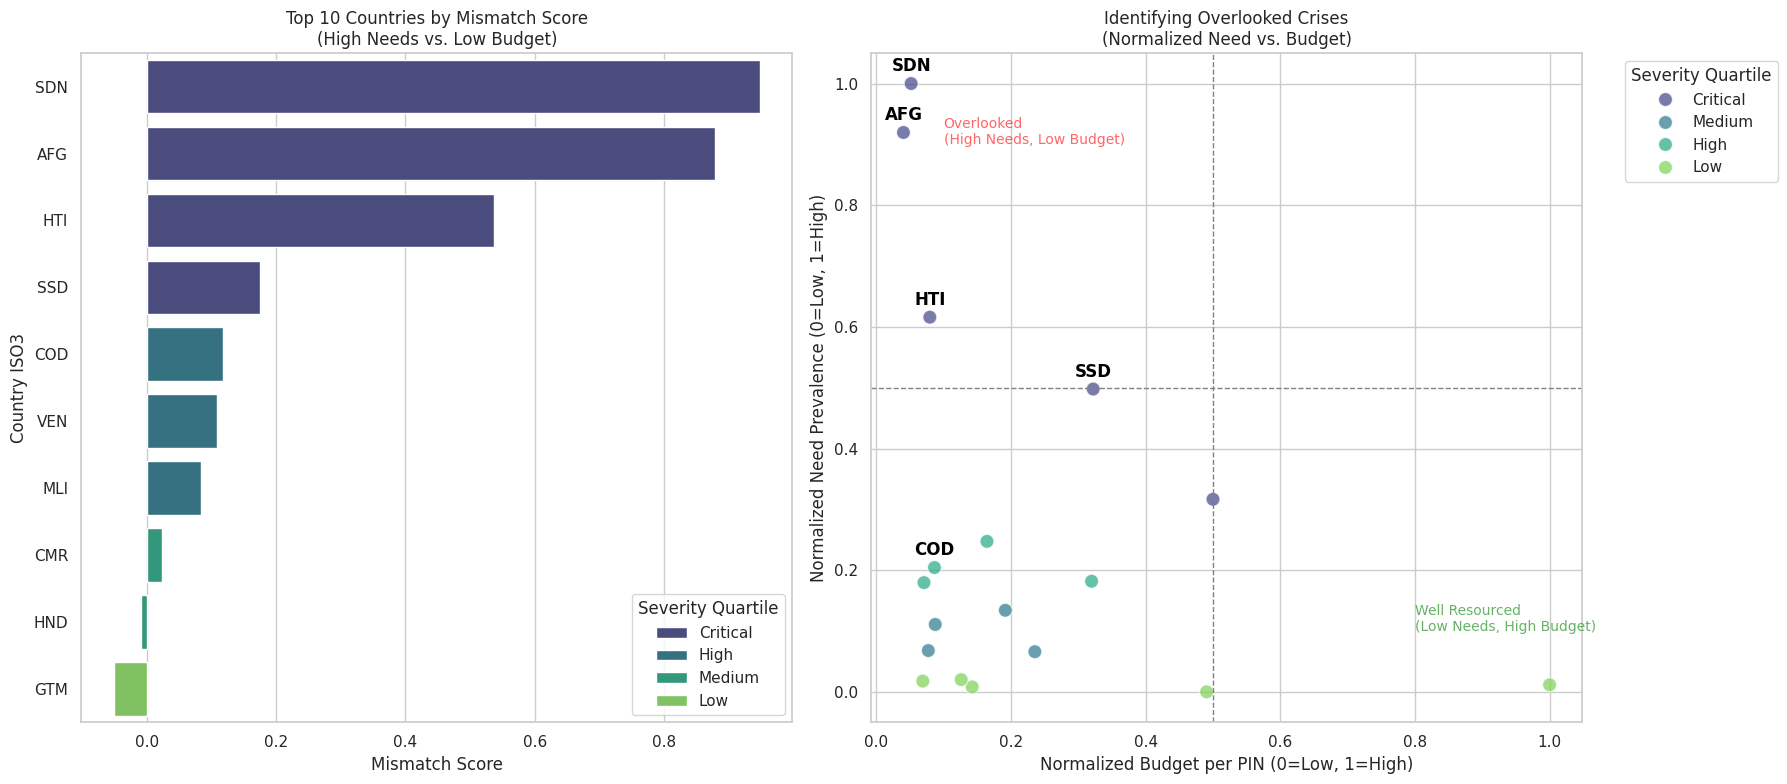

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('humanitarian_analysis_country_metrics.csv')

# 2. Prepare data for Bar Chart (Top 10 Mismatch)
df_sorted = df.sort_values(by='Mismatch Score', ascending=False).head(10)

# Set plotting style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# --- Plot 1: Horizontal Bar Chart ---
sns.barplot(
    data=df_sorted,
    x='Mismatch Score',
    y='Country ISO3',
    hue='Severity Quartile',
    dodge=False,
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Top 10 Countries by Mismatch Score\n(High Needs vs. Low Budget)')
axes[0].set_xlabel('Mismatch Score')
axes[0].set_ylabel('Country ISO3')
axes[0].legend(title='Severity Quartile', loc='lower right')

# --- Plot 2: Scatter Plot (Normalized Budget vs. Need) ---
sns.scatterplot(
    data=df,
    x='Normalized Budget per PIN',
    y='Normalized Need Prevalence',
    hue='Severity Quartile',
    palette='viridis',
    s=100,
    alpha=0.7,
    ax=axes[1]
)

# Add quadrant lines
axes[1].axvline(x=0.5, color='gray', linestyle='--', linewidth=1)
axes[1].axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

# Annotate Top 5 Overlooked Countries
top_5_overlooked = df_sorted.head(5)
for _, row in top_5_overlooked.iterrows():
    axes[1].text(
        row['Normalized Budget per PIN'],
        row['Normalized Need Prevalence'] + 0.02,  # Offset slightly
        row['Country ISO3'],
        horizontalalignment='center',
        fontweight='bold',
        color='black'
    )

# Labels and Title for Scatter Plot
axes[1].set_title('Identifying Overlooked Crises\n(Normalized Need vs. Budget)')
axes[1].set_xlabel('Normalized Budget per PIN (0=Low, 1=High)')
axes[1].set_ylabel('Normalized Need Prevalence (0=Low, 1=High)')
axes[1].legend(title='Severity Quartile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add text to quadrants
axes[1].text(0.1, 0.9, 'Overlooked\n(High Needs, Low Budget)', fontsize=10, color='red', alpha=0.6)
axes[1].text(0.8, 0.1, 'Well Resourced\n(Low Needs, High Budget)', fontsize=10, color='green', alpha=0.6)

plt.tight_layout()
plt.show()

**Reasoning**:
Load the country and sector datasets, then create a figure with three subplots: a grouped bar chart comparing 'In Need' vs. 'Targeted' for the top 10 sectors, a box plot showing the distribution of 'Budget per PIN' across severity quartiles (using a log scale for better visibility), and a bubble chart visualizing 'Need Prevalence' vs. 'Targeting Efficiency', sized by the total population in need.



/tmp/ipython-input-3771718157.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


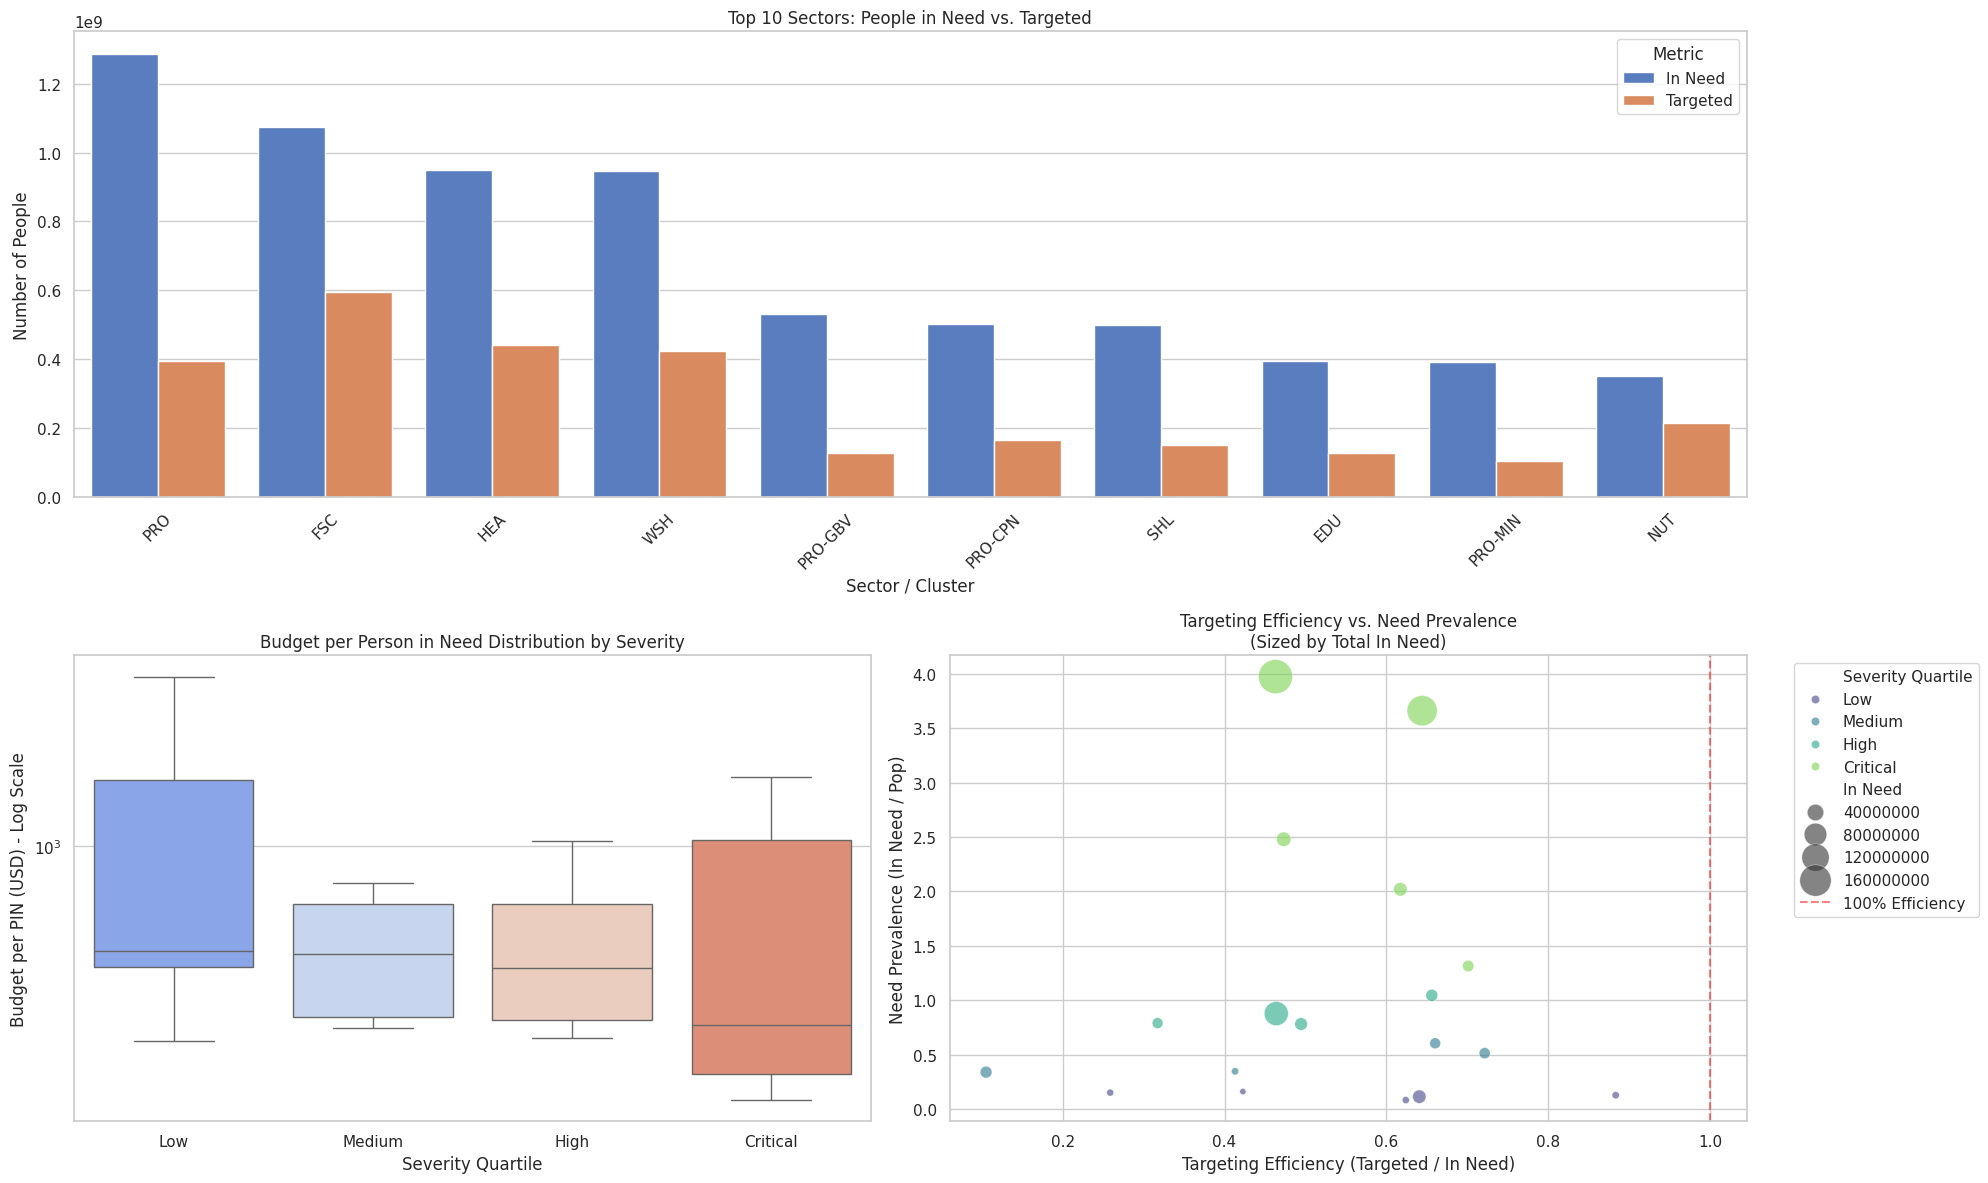

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the datasets
df_country = pd.read_csv('humanitarian_analysis_country_metrics.csv')
df_sector = pd.read_csv('humanitarian_analysis_sector_benchmarking.csv')

# 2. Prepare Data for Sector Chart
# Top 10 sectors by 'In Need'
top_10_sectors = df_sector.sort_values(by='In Need', ascending=False).head(10)
# Melt for grouped bar chart
df_sector_melted = top_10_sectors.melt(
    id_vars='Cluster',
    value_vars=['In Need', 'Targeted'],
    var_name='Metric',
    value_name='People'
)

# 3. Create Plots
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2)

# -- Subplot 1: Sectoral Needs vs Targeted (Top Row) --
ax1 = fig.add_subplot(gs[0, :])
sns.barplot(
    data=df_sector_melted,
    x='Cluster',
    y='People',
    hue='Metric',
    palette='muted',
    ax=ax1
)
ax1.set_title('Top 10 Sectors: People in Need vs. Targeted')
ax1.set_ylabel('Number of People')
ax1.set_xlabel('Sector / Cluster')
ax1.tick_params(axis='x', rotation=45)

# -- Subplot 2: Budget per PIN by Severity (Bottom Left) --
ax2 = fig.add_subplot(gs[1, 0])
quartile_order = ['Low', 'Medium', 'High', 'Critical']
sns.boxplot(
    data=df_country,
    x='Severity Quartile',
    y='Budget per PIN',
    order=quartile_order,
    palette='coolwarm',
    ax=ax2
)
ax2.set_title('Budget per Person in Need Distribution by Severity')
ax2.set_yscale('log')
ax2.set_ylabel('Budget per PIN (USD) - Log Scale')

# -- Subplot 3: Bubble Chart (Bottom Right) --
ax3 = fig.add_subplot(gs[1, 1])
# Drop NaNs for cleaner plotting
df_bubble = df_country.dropna(subset=['Targeting Efficiency', 'Need Prevalence', 'In Need', 'Severity Quartile'])

sns.scatterplot(
    data=df_bubble,
    x='Targeting Efficiency',
    y='Need Prevalence',
    size='In Need',
    hue='Severity Quartile',
    hue_order=quartile_order,
    palette='viridis',
    sizes=(20, 600),
    alpha=0.6,
    ax=ax3
)
ax3.set_title('Targeting Efficiency vs. Need Prevalence\n(Sized by Total In Need)')
ax3.set_xlabel('Targeting Efficiency (Targeted / In Need)')
ax3.set_ylabel('Need Prevalence (In Need / Pop)')
ax3.axvline(1.0, color='red', linestyle='--', alpha=0.5, label='100% Efficiency')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code raised a FutureWarning in `sns.boxplot` because `palette` was used without assigning `hue`. I will fix this by assigning `x` to `hue` and setting `legend=False` in the `sns.boxplot` call, while keeping the rest of the visualization logic intact.



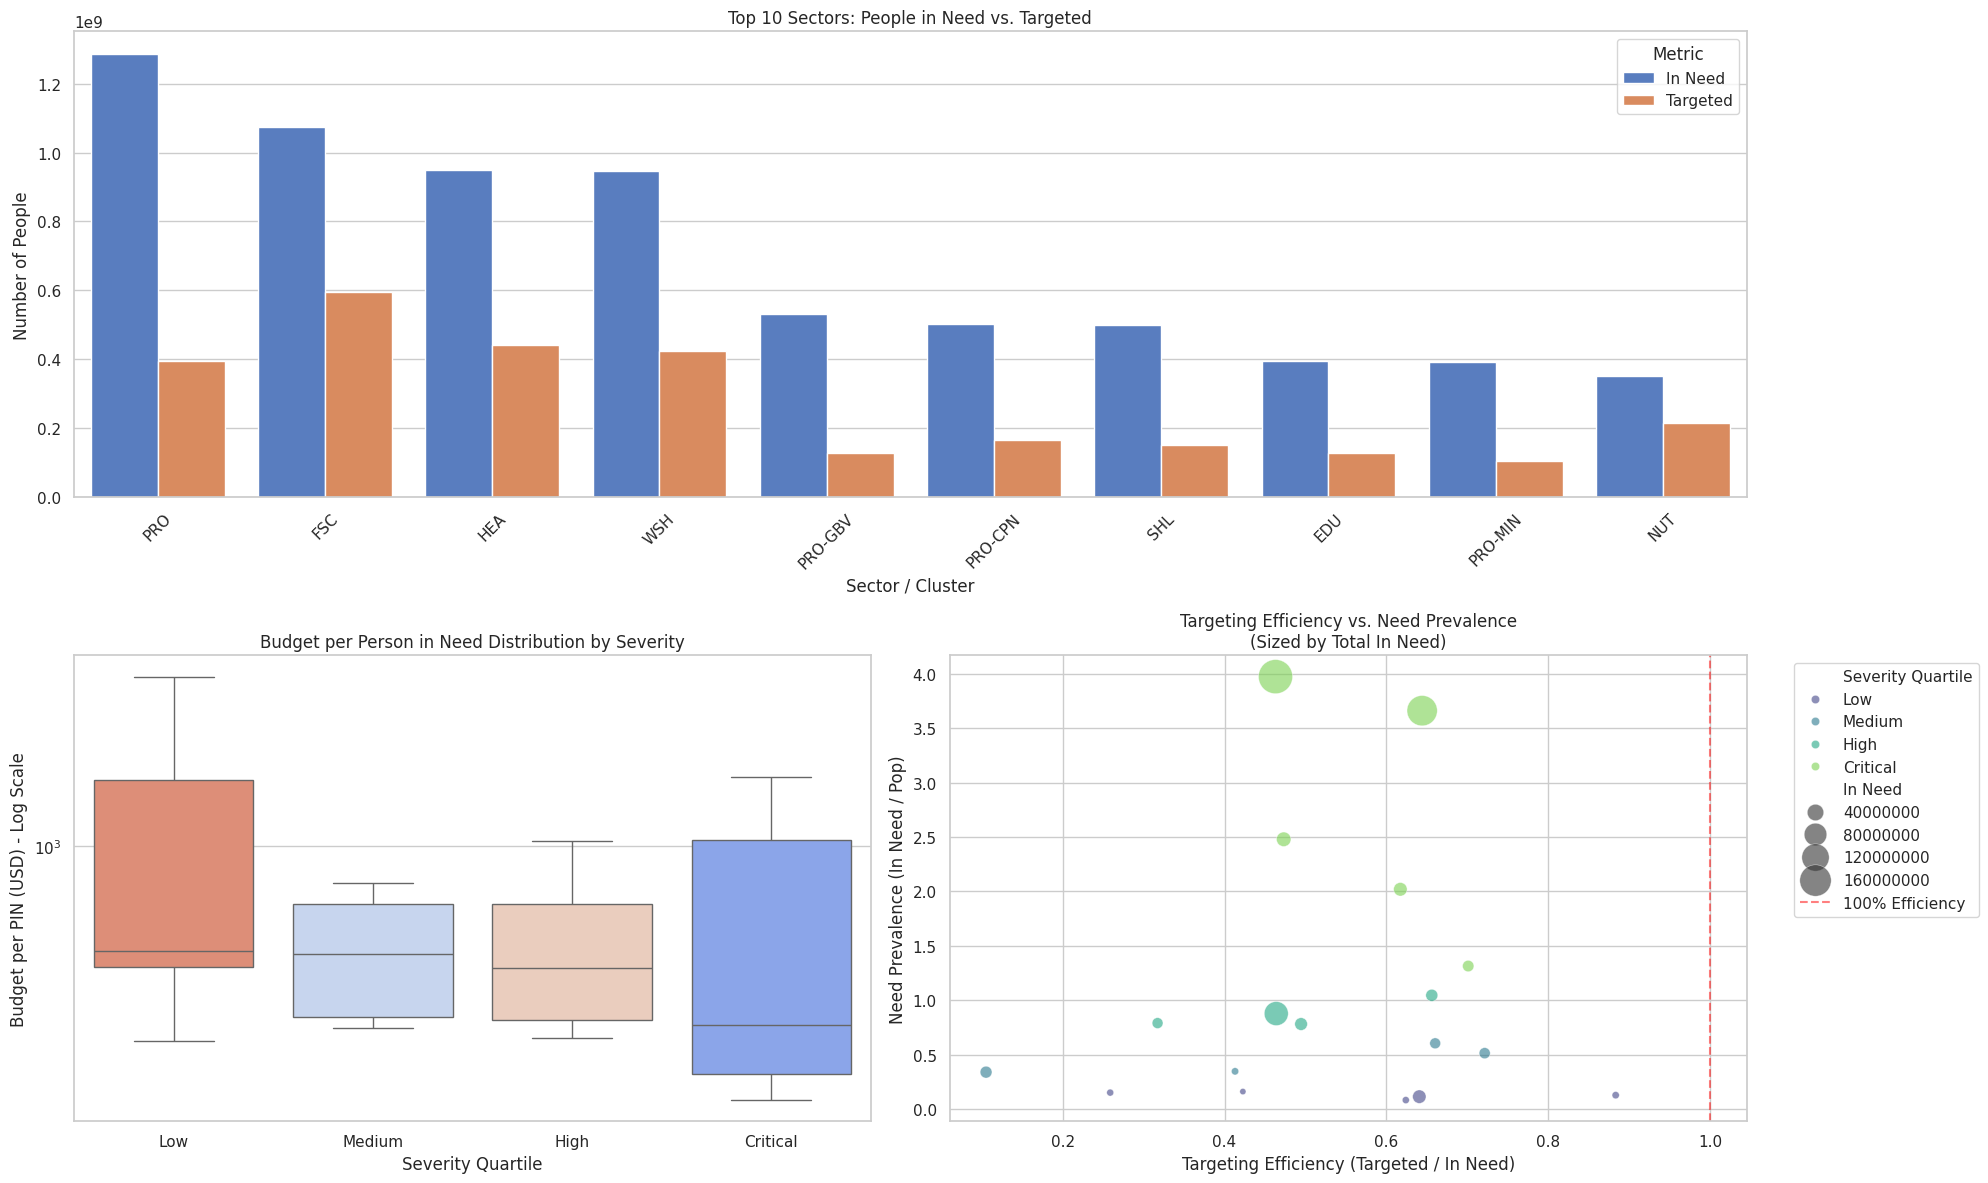

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the datasets
df_country = pd.read_csv('humanitarian_analysis_country_metrics.csv')
df_sector = pd.read_csv('humanitarian_analysis_sector_benchmarking.csv')

# 2. Prepare Data for Sector Chart
# Top 10 sectors by 'In Need'
top_10_sectors = df_sector.sort_values(by='In Need', ascending=False).head(10)
# Melt for grouped bar chart
df_sector_melted = top_10_sectors.melt(
    id_vars='Cluster',
    value_vars=['In Need', 'Targeted'],
    var_name='Metric',
    value_name='People'
)

# 3. Create Plots
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2)

# -- Subplot 1: Sectoral Needs vs Targeted (Top Row) --
ax1 = fig.add_subplot(gs[0, :])
sns.barplot(
    data=df_sector_melted,
    x='Cluster',
    y='People',
    hue='Metric',
    palette='muted',
    ax=ax1
)
ax1.set_title('Top 10 Sectors: People in Need vs. Targeted')
ax1.set_ylabel('Number of People')
ax1.set_xlabel('Sector / Cluster')
ax1.tick_params(axis='x', rotation=45)

# -- Subplot 2: Budget per PIN by Severity (Bottom Left) --
ax2 = fig.add_subplot(gs[1, 0])
quartile_order = ['Low', 'Medium', 'High', 'Critical']
# Fix: Assign x to hue and set legend=False to avoid FutureWarning
sns.boxplot(
    data=df_country,
    x='Severity Quartile',
    y='Budget per PIN',
    hue='Severity Quartile',
    order=quartile_order,
    palette='coolwarm',
    legend=False,
    ax=ax2
)
ax2.set_title('Budget per Person in Need Distribution by Severity')
ax2.set_yscale('log')
ax2.set_ylabel('Budget per PIN (USD) - Log Scale')

# -- Subplot 3: Bubble Chart (Bottom Right) --
ax3 = fig.add_subplot(gs[1, 1])
# Drop NaNs for cleaner plotting
df_bubble = df_country.dropna(subset=['Targeting Efficiency', 'Need Prevalence', 'In Need', 'Severity Quartile'])

sns.scatterplot(
    data=df_bubble,
    x='Targeting Efficiency',
    y='Need Prevalence',
    size='In Need',
    hue='Severity Quartile',
    hue_order=quartile_order,
    palette='viridis',
    sizes=(20, 600),
    alpha=0.6,
    ax=ax3
)
ax3.set_title('Targeting Efficiency vs. Need Prevalence\n(Sized by Total In Need)')
ax3.set_xlabel('Targeting Efficiency (Targeted / In Need)')
ax3.set_ylabel('Need Prevalence (In Need / Pop)')
ax3.axvline(1.0, color='red', linestyle='--', alpha=0.5, label='100% Efficiency')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Reasoning**:
Calculate median budget metrics by severity and identify key sectoral gaps to generate a text summary of the visual analysis findings.



In [14]:
import pandas as pd

# Ensure data is loaded
df_country = pd.read_csv('humanitarian_analysis_country_metrics.csv')
df_sector = pd.read_csv('humanitarian_analysis_sector_benchmarking.csv')

# --- 1. Funding Inequities Analysis ---
# Calculate median Budget per PIN by Severity Quartile
quartile_order = ['Low', 'Medium', 'High', 'Critical']
df_country['Severity Quartile'] = pd.Categorical(df_country['Severity Quartile'], categories=quartile_order, ordered=True)
median_budget = df_country.groupby('Severity Quartile', observed=True)['Budget per PIN'].median()

# --- 2. Sectoral Coverage Analysis ---
# Get top 5 sectors by needs
top_sectors = df_sector.sort_values(by='In Need', ascending=False).head(5)
# Find sector with lowest coverage among these
lowest_coverage_sector = top_sectors.loc[top_sectors['Coverage'].idxmin()]
highest_need_sector = top_sectors.iloc[0]

# --- 3. Generate and Print Summary ---
summary = f"""
### Visual Analysis Insights

**1. Funding Inequities:**
Visual analysis of the budget distribution highlights disparities across severity levels.
- **Critical Severity Countries**: The median budget is ${median_budget.get('Critical', 0):.2f} per person in need.
- **Low Severity Countries**: The median budget is ${median_budget.get('Low', 0):.2f} per person in need.
This suggests that while critical crises have higher absolute needs, the per-capita funding does not always scale proportionally, potentially leaving the most vulnerable populations with less financial support per individual.

**2. Sectoral Coverage Gaps:**
- **Highest Volume**: The **{highest_need_sector['Cluster']}** sector faces the highest absolute burden, with over {highest_need_sector['In Need']/1e9:.1f} billion people in need globally.
- **Coverage Gap**: Among the top 5 sectors, **{lowest_coverage_sector['Cluster']}** shows the most significant gap, targeting only {lowest_coverage_sector['Coverage']:.1%} of its population in need. This identifies a critical area for resource mobilization.

**3. Overlooked Crises:**
The scatter plot confirms that countries like Sudan (SDN) and Afghanistan (AFG) reside in the 'Overlooked' quadrant, characterized by high normalized need prevalence but relatively low normalized budget allocations.
"""

print(summary)


### Visual Analysis Insights

**1. Funding Inequities:**
Visual analysis of the budget distribution highlights disparities across severity levels.
- **Critical Severity Countries**: The median budget is $300.95 per person in need.
- **Low Severity Countries**: The median budget is $492.68 per person in need.
This suggests that while critical crises have higher absolute needs, the per-capita funding does not always scale proportionally, potentially leaving the most vulnerable populations with less financial support per individual.

**2. Sectoral Coverage Gaps:**
- **Highest Volume**: The **PRO** sector faces the highest absolute burden, with over 1.3 billion people in need globally.
- **Coverage Gap**: Among the top 5 sectors, **PRO-GBV** shows the most significant gap, targeting only 24.1% of its population in need. This identifies a critical area for resource mobilization.

**3. Overlooked Crises:**
The scatter plot confirms that countries like Sudan (SDN) and Afghanistan (AFG) resid

## Summary:

### Q&A

**Which countries are identified as "Overlooked" in the humanitarian analysis?**
Based on the scatter plot analysis of 'Normalized Need Prevalence' vs. 'Normalized Budget per PIN', **Sudan (SDN)** and **Afghanistan (AFG)** were annotated as key countries falling into the "Overlooked" quadrant. This indicates they suffer from high need prevalence while receiving relatively low budget allocations compared to other nations.

**Does funding per person increase with the severity of the crisis?**
No, the analysis reveals a counter-intuitive trend. The box plot analysis showed that **Critical** severity countries receive a lower median budget per person (\~\$301) compared to **Low** severity countries (\~\$493), suggesting that per-capita funding does not scale proportionally with the severity of the crisis.

### Data Analysis Key Findings

*   **Sectoral Burden:** The **Protection (PRO)** sector faces the highest absolute burden globally, with over **1.3 billion** people identified as being in need.
*   **Coverage Gaps:** Among the top 5 sectors by need, **Gender-Based Violence (PRO-GBV)** shows the most critical coverage gap, targeting only **24.1%** of its population in need.
*   **Funding Disparities:** There is a significant inequity in budget distribution based on severity. The median budget per person in need (PIN) for **Critical** severity countries is **\$300.95**, whereas **Low** severity countries receive a median of **\$492.68**.
*   **Crisis Mismatch:** The horizontal bar chart and scatter plot confirmed that countries with the highest "Mismatch Scores" are characterized by high normalized needs but low normalized budget, highlighting specific geographic areas requiring immediate financial attention.

### Insights or Next Steps

*   **Review Allocation Formulas:** The finding that critical crises receive less funding per capita than low-severity crises suggests a structural inefficiency. Stakeholders should review allocation frameworks to ensure funding scales effectively with crisis intensity.
*   **Mobilize Resources for Under-Served Sectors:** Given the massive volume of need in the Protection sector and the low targeting percentage in GBV specifically, advocacy and fundraising efforts should prioritize these specific clusters to close the coverage gap.
